# Analysis of Streaming Application  - Data Visualisation Project

This project explores a streaming application viewership dataset that represents a collection of information on how users interact with the streaming app. The dataset is provided by a user from Kaggle(https://www.kaggle.com/datasets/rajatkumar30/streaming-application-viewership). We will be using Python to analyze the dataset and a series of visualisations such as pandas and SciPy libraries to answer the following questions:

1. Which genres are most popular among male and female?
2. Do males or females spend more time on the streaming application?
3. What age group has the most viewed time and under which category?
4. Is there a correlation between subscription status and playback quality?
5. Which language of content is the most popular in different countries?
6. Which devices are most popular among male and female audience?

### Import Libraries

In [177]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 

stream_data = pd.read_csv('streaming_viewership_data.csv')
stroke_data = pd.read_csv('stroke_prediction_dataset.csv')

### Load and Inspect Data

In [178]:
print(stream_data.info())
stream_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              6214 non-null   object 
 1   Session_ID           6214 non-null   object 
 2   Device_ID            6214 non-null   int64  
 3   Video_ID             6214 non-null   int64  
 4   Duration_Watched     6214 non-null   float64
 5   Genre                6214 non-null   object 
 6   Country              6214 non-null   object 
 7   Age                  6214 non-null   int64  
 8   Gender               6214 non-null   object 
 9   Subscription_Status  6214 non-null   object 
 10  Ratings              6214 non-null   int64  
 11  Languages            6214 non-null   object 
 12  Device_Type          6214 non-null   object 
 13  Location             6214 non-null   object 
 14  Playback_Quality     6214 non-null   object 
 15  Interaction_Events   6214 non-null   i

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched,Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


The dataset contains 6214 rows and 16 columns containing information on different attributes of an individual.
Here's a quick summary of the columns:

- **User_ID**: A unique identifier for the user.
- **Session_ID**: A unique identifier for the user's session.
- **Device_ID**: An identifier for the user's device.
- **Video_ID**: An identifier for the video content being viewed.
- **Duration_Watched**: The amount of time (in minutes) the user spent watching the video.
- **Genre**: The genre of the video content (e.g., Action, Comedy, Drama, etc.).
- **Country**: The country where the interaction event took place.
- **Age**: The age of the user.
- **Gender**: The gender of the user (e.g., Male, Female).
- **Subscription_Status**: The user's subscription status (e.g., Free, Premium).
- **Ratings**: The user's rating or feedback for the content (typically on a scale from 1 to 5).
- **Comment**s: Any comments or feedback left by the user.
- **Languages**: The language of the content being viewed.
- **Device_Type**: The type of device used by the user (e.g., Smartphone, Tablet, etc.).
- **Location**: The location or city where the interaction event occurred.
- **Playback_Quality**: The quality of video playback (e.g., HD, SD, 4K).
- **Interaction_Events**: The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.).

## Data Cleaning and Preparation

In [179]:
def clean_df_text(df):
    # clean the column name texts
    df.columns = df.columns.str.strip()

    # clean the row value texts
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.title()
            df[column] = df[column].str.strip()

    return df

In [180]:
stream = clean_df_text(stream_data)

## Data Question 1: Which genres are most popular among male and female?

In [181]:
# Initial genre counts
genre = stream.Genre.value_counts().rename_axis('Genre').reset_index(name='Count')
genre

,Genre,Count
0,Documentary,1065
1,Thriller,1050
2,Sci-Fi,1041
3,Comedy,1033
4,Action,1030
5,Drama,995


In [202]:
# finding genre count for male and female 
genre_counts_male = [0,0,0,0,0,0]
genre_counts_female = [0,0,0,0,0,0]
index = 0

for i in genre.Genre:
    for n in range(0, len(stream)):
        if stream.Genre[n] == i and stream.Gender[n] == 'Male':
            genre_counts_male[index] += 1
        if stream.Genre[n] == i and stream.Gender[n] == 'Female':
            genre_counts_female[index] += 1
    index += 1

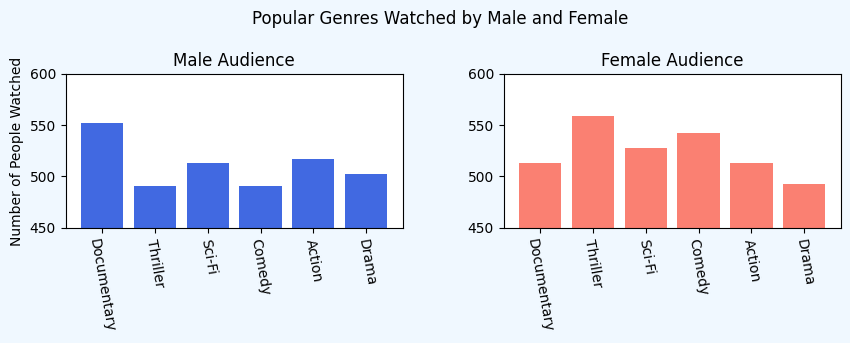

In [183]:
# plotting bar chart 
fig = plt.figure(figsize = (10,2), facecolor = 'aliceblue')
plt.subplot(1,2,1)
plt.bar(height =  genre_counts_male, x = genre.Genre, color = 'royalblue')
plt.title('Male Audience', fontsize = 12)
plt.xticks(rotation = -80)
plt.ylabel('Number of People Watched')
plt.ylim(450, 600)

plt.subplot(1,2,2)
plt.bar(height =  genre_counts_female, x = genre.Genre, color = 'salmon')
plt.title('Female Audience', fontsize = 12)
plt.xticks(rotation =-80)
plt.ylim(450, 600)
plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.suptitle('Popular Genres Watched by Male and Female', y= 1.2)
plt.show()

According to the graph above, the 'Documentary' genre is the most popular among the male audience, followed by the 'Action' genre and 'Sci-Fi' genre. The 'Documentary' genre has the large lead in view count with approximately 550 men whilst the 'Action' and 'Sci-Fi' genre have a view count of approximately 525 and 520 respectively. For the female audience, the 'Thriller' genre is leading among all the other genres with a view count of approximately 560. The 2nd and 3rd most popular genre is 'Comedy' and 'Sci-Fi' respectively.  

## Data Question 2: Do males or females spend more time on the streaming application?

In [252]:
# Finding total male and female view count
genre = stream.Gender.value_counts().rename_axis('Gender').reset_index(name='Count')
genre

,Gender,Count
0,Female,3148
1,Male,3066


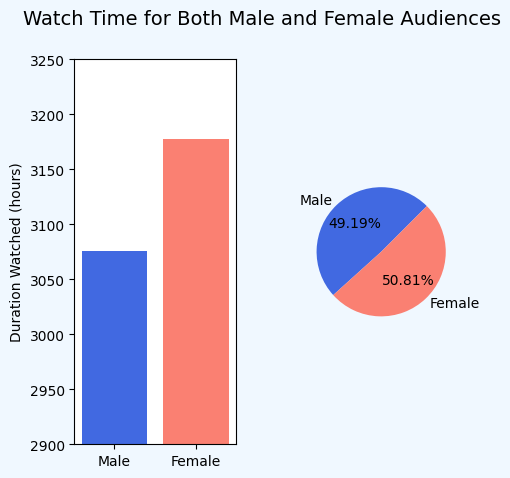

In [213]:
# Plotting bar chart and pie chart for male and female watch times 
watch_time_gender = [0, 0]

for i in range(0, len(stream)):
    if stream.Gender[i] == 'Male':
        watch_time_gender[0] += stream.Duration_Watched[i]/60
    elif stream.Gender[i] == 'Female':
        watch_time_gender[1] += stream.Duration_Watched[i]/60
        
fig = plt.figure(facecolor = 'aliceblue', figsize = (5, 5))
fig.suptitle("Watch Time for Both Male and Female Audiences", fontsize = 14)
plt.subplots_adjust(wspace=0.4,hspace=0.7)
plt.subplot(1,2,1)        
plt.bar(x = ['Male', 'Female'], height = watch_time_gender, color = ['royalblue','salmon'])
plt.ylabel('Duration Watched (hours)')
plt.xlabel
plt.ylim(2900, 3250)

plt.subplot(1,2,2)
plt.pie(x = watch_time_gender, autopct='%1.2f%%', labels = ['Male', 'Female'], startangle = 45, colors = ['royalblue', 'salmon'])
plt 
plt.show()

The female audience has a higher watch time of approximately 3175 hours. However, the difference in watch time between the male and female audience is insignificant with a difference of approximately 120 hours. The pie chart above clearly indicates that the difference view count is only by a small percentage. 

 ## Data Question 3: What age group has the most viewed time and under which category?

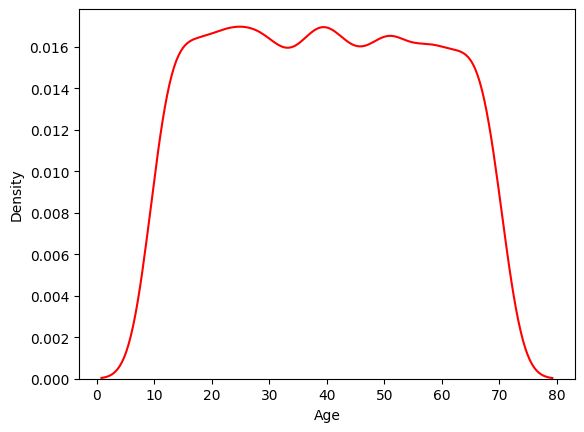

In [185]:
# Plotting KDE graph
sns.kdeplot(data = stream, x = 'Age', color = 'red')
plt.show()

In [212]:
# Grouping watch time by age group
watch_time = [0,0,0,0,0,0]
age_group = ['10 to 19','20 to 29','30 to 39','40 to 49','50 to 59','60 to 70']

for n in range(0, len(stream)):
    if stream.Age[n] >= 10 and stream.Age[n] < 20:
        watch_time[0] += 1
    elif stream.Age[n] >= 20 and stream.Age[n] < 30:
        watch_time[1] += 1
    elif stream.Age[n] >= 30 and stream.Age[n] < 40:
        watch_time[2] += 1
    elif stream.Age[n] >= 40 and stream.Age[n] < 50:
        watch_time[3] += 1
    elif stream.Age[n] >= 50 and stream.Age[n] < 60:
        watch_time[4] += 1
    else:
        watch_time[5] += 1

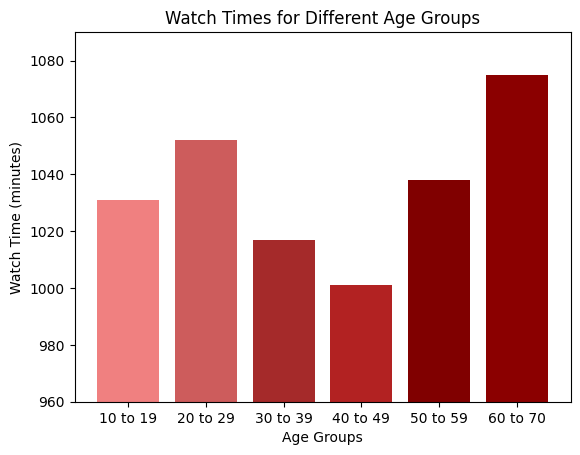

In [214]:
# Plotting bar chart 
plt.bar(x = age_group, height = watch_time, color = ['lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred'])
plt.xlabel('Age Groups')
plt.ylabel('Watch Time (minutes)')
plt.title('Watch Times for Different Age Groups')
plt.ylim(960, 1090)
plt.show()

Surprisingly, people of ages between 60 to 70 have the highest watch time in this streaming application with approximately 1070 minutes. The 20 to 29 age group comes in second followed by 50 to 59 year olds with 1055 minutes and 1040 minutes respectively. 40 to 49 year olds spend the least amount of time on the app with an estimate of 1000 minutes only. 

 ## Data Question 4: Is there a correlation between subscription status and playback quality?

In [188]:
# Initial language count
subscription = stream.Subscription_Status.value_counts().rename_axis('Subscription').reset_index(name='Count')
subscription 

,Subscription,Count
0,Free,3111
1,Premium,3103


In [189]:
# Playback count
playback = stream.Playback_Quality.value_counts().rename_axis('Quality').reset_index(name='Count')
playback 

,Quality,Count
0,4K,2092
1,Sd,2066
2,Hd,2056


In [215]:
# Categorizing stream quality by free and premium subscription
free_count = [0,0,0]
premium_count = [0,0,0]
index = 0

for quality in playback.Quality:
    for n in range(0, len(stream)):
        if stream.Playback_Quality[n] == quality and stream.Subscription_Status[n] == 'Free':
            free_count[index] += 1
        elif stream.Playback_Quality[n] == quality and stream.Subscription_Status[n] == 'Premium':
            premium_count[index] += 1
    index += 1

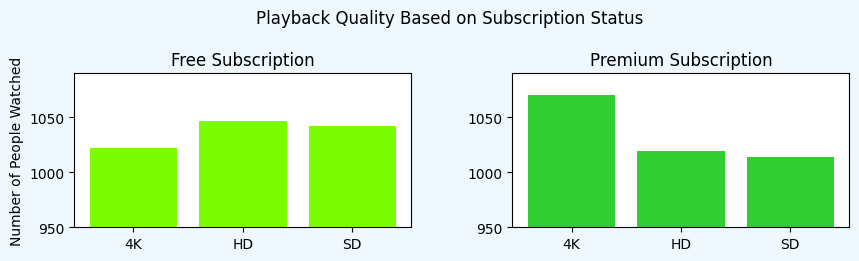

In [191]:
# Plotting bar chart 
fig = plt.figure(figsize = (10,2), facecolor = 'aliceblue')
plt.subplot(1,2,1)
plt.bar(height =  free_count, x = ['4K', 'HD', 'SD'], color = 'lawngreen')
plt.title('Free Subscription', fontsize = 12)
plt.ylabel('Number of People Watched')
plt.ylim(950, 1090)

plt.subplot(1,2,2)
plt.bar(height = premium_count, x = ['4K', 'HD', 'SD'], color = 'limegreen')
plt.title('Premium Subscription', fontsize = 12)
plt.ylim(950, 1090)
plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.suptitle('Playback Quality Based on Subscription Status', y= 1.2)
plt.show()

The graph on the left indicates that people with free subscription tend to watch videos in 'High Definition'(HD) the most, followed by 'Standard Definition'(SD). Whereas, people with premium subscription are much more likely to watch videows in 4K. 

## Data Question 5: Which language of content is the most popular in different countries?

In [237]:
# Initial language count
languages = stream.Languages.value_counts().rename_axis('Languages').reset_index(name='Count')
languages

,Languages,Count
0,English,1313
1,Chinese,1264
2,German,1257
3,Spanish,1196
4,French,1184


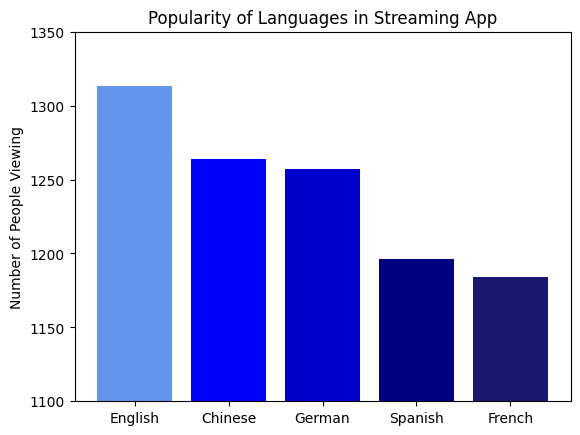

In [239]:
# Plotting pie chart for languages
plt.bar(x = languages.Languages, height = languages.Count, color= ['cornflowerblue', 'blue', 'mediumblue', 
                                                                                       'navy', 'midnightblue'])
plt.ylim(1100, 1350)
plt.ylabel('Number of People Viewing')
plt.title('Popularity of Languages in Streaming App')
plt.show()

English content is by far the most popular among the others with an estimate of 1315 people watching. Chinese and German content are the 2nd and 3rd most popular content respectively with Chinese content leading by small margin of approximately 1260 people and approximately 1255 people for German content.

In [193]:
# Initial country count
country = stream.Country.value_counts().rename_axis('Country').reset_index(name='Count')
country

,Country,Count
0,Congo,49
1,Wallis And Futuna,42
2,Korea,42
3,Solomon Islands,41
4,Uganda,39
...,...,...
238,Rwanda,17
239,Colombia,17
240,Bolivia,17
241,Afghanistan,15


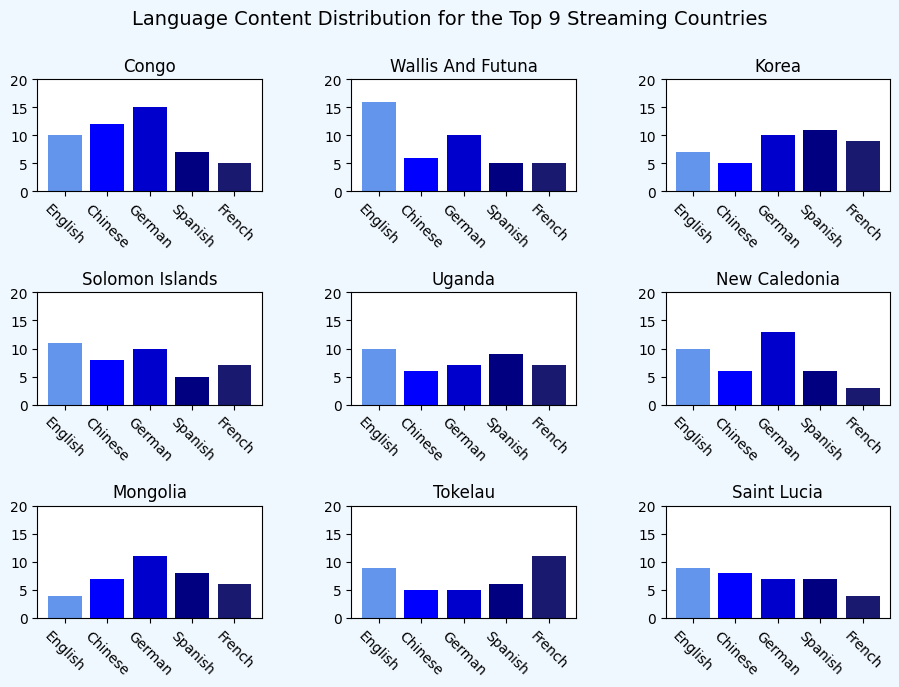

In [241]:
# Plotting bar charts 
country_list = []
count = 0
language_count = []
language_list = ['English', 'Chinese', 'German', 'Spanish', 'French']
index = 1

fig = plt.figure(facecolor = 'aliceblue', figsize = (11, 7))
fig.suptitle("Language Content Distribution for the Top 9 Streaming Countries", fontsize = 14)

for i in range(0,9):
    country_list.append(country.Country[i])
    
for n in country_list:
    for language in language_list:
        for m in range(0, len(stream)):
            if stream.Country[m] == n and stream.Languages[m] == language:
                count += 1
        language_count.append(count)
        count = 0
    plt.subplot(3,3,index)
    plt.subplots_adjust(wspace=0.4,hspace=0.9)
    plt.bar(x = language_list, height = language_count, color= ['cornflowerblue', 'blue', 'mediumblue', 
                                                                                       'navy', 'midnightblue'])
    plt.xticks(rotation = -45)
    plt.title(n)
    plt.ylim(0, 20)
    language_count = []
    index += 1
         
plt.show()

The graphs above shows the popularity of different languages in the top 9 highest streaming countries. The streaming app is most popular in Congo, followed by Wallis and Futuna, Korea  then Solomon Islands, so on and so forth. Since English content is the most streamed, it is no suprise that 4 out of 9 countries (Wallis and Futuna, Soloman Islands, Uganda and Tokelau) have English as their most streamed content. German content is also popular among these countries especially in Congo, New Caledonia and Mongolia, seeing that it is the most popular content.

## Data Question 6: Which devices are most popular among male and female audience?

In [195]:
# Inital device count
device = stream.Device_Type.value_counts().rename_axis('Devices').reset_index(name='Count')
device

,Devices,Count
0,Smart Tv,1306
1,Desktop,1270
2,Smartphone,1233
3,Tablet,1217
4,Laptop,1188


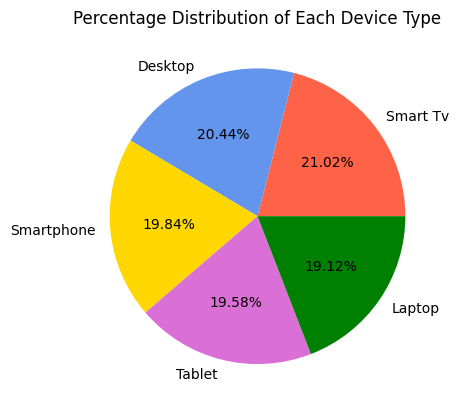

In [243]:
# Plotting pie chart for device types
device_list = []
device_total_count = 0

for i in range(0, len(device)):
    device_list.append(device.Devices[i])

# Plotting pie chart for device type
plt.pie(x = device.Count, labels = device_list, colors = ['tomato', 'cornflowerblue', 'gold', 'orchid', 'green',], autopct='%1.2f%%')
plt.title('Percentage Distribution of Each Device Type')
plt.show()

The usage distribution of the device types are nearly evenly distributed. Smart TV is only leading with a tiny percentage with 21.02% usage followed by desktop and smartphone with 20.44% and 19.84% respectively.

In [244]:
# Finding watch time for each device type
device_watch_time = [0,0,0,0,0]
index = 0

for device_name in device.Devices:
    for n in range(0, len(stream)):
        if stream.Device_Type[n] == device_name:
            device_watch_time[index] += stream.Duration_Watched[n]/60
    index += 1

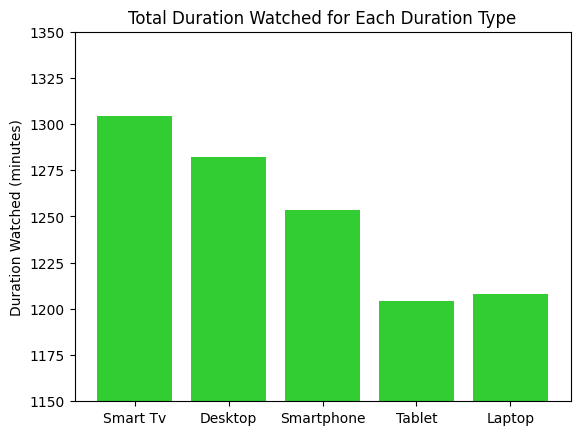

In [251]:
# Plotting bar chart 
plt.bar(x = device.Devices, height = device_watch_time, color = 'limegreen')
plt.ylim(1150,1350)
plt.ylabel('Duration Watched (minutes)')
plt.title('Total Duration Watched for Each Duration Type')
plt.show()

Smart TV has the highest watch time with approximately 1305 hours. Next is desktop and smartphone with approximately 1280 hours and 1250 hours respectively. Even though laptops have a lower usage than tablets, laptops have a slightly higher watch time.

In [260]:
device_male = [0,0,0,0,0]
device_female = [0,0,0,0,0]
device_index = 0

for dev in device.Devices:
    for n in range(0, len(stream)):
        if stream.Device_Type[n] == dev and stream.Gender[n] == 'Male':
            device_male[device_index] += stream.Duration_Watched[n]/60
        elif stream.Device_Type[n] == dev and stream.Gender[n] == 'Female':
            device_female[device_index] += stream.Duration_Watched[n]/60
    device_index += 1

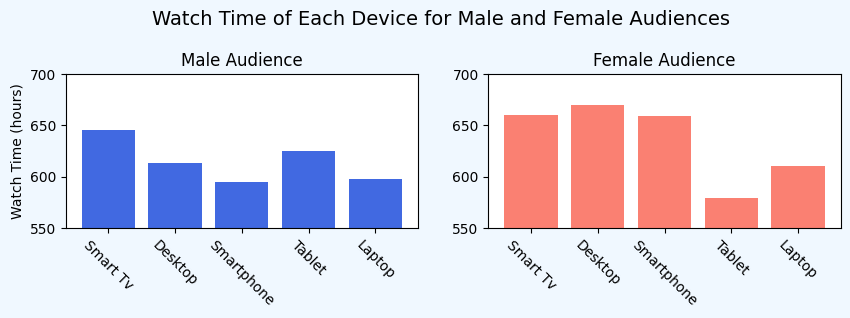

In [284]:
fig = plt.figure(figsize = (10,2), facecolor = 'aliceblue')
plt.suptitle('Watch Time of Each Device for Male and Female Audiences', y= 1.2, fontsize = 14)
plt.subplot(1,2,1)
plt.bar(x = device.Devices, height = device_male, color = 'royalblue')
plt.title('Male Audience', fontsize = 12)
plt.xticks(rotation = -45)
plt.ylabel('Watch Time (hours)')
plt.ylim(550, 700)

plt.subplot(1,2,2)
plt.bar(x = device.Devices, height = device_female, color = 'salmon')
plt.title('Female Audience', fontsize = 12)
plt.xticks(rotation = -45)
plt.ylim(550, 700)
plt.subplots_adjust(wspace=0.2,hspace=0.6)
plt.show()

For the male audience, videos are mostly streamed on Smart TV with approximately a total 645 hours, followed by on the tablet with 625 hours. For the female audience, the desktop is the most popular device to stream on with Smart TV as a close second . Smarthphones are the third most popular device for the female audience.

## Conclusion

The goal of this project was to gain an insight on the viewership of a video streaming application. After some exploration and analysis of the data, it was found that the app has a higher female audience than male audience by a small margin. The different genres also played a role in each gender where the 'Documentary' genre was seen to be more popular among men and 'Thriller' genre was popular among women. Our analysis also found that people from ages 60 to 69 spend the most time on the streaming app which was interesting. In addition, we found that people with a free subscriptions tend to watch videos in High Definition and people with a premium subscription are more likely to watch videos in 4K. Another finding was that English content is the most popular followed by Chinese and German content on the app. Lastly, Smart TVs are the most popular devices to stream videos especially for male audiences. 